# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [1]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
print(type(tips))
tips

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## rugplot, kdeplot, displot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

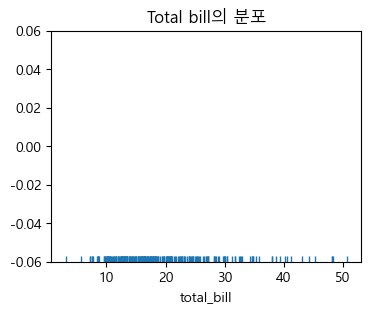

In [8]:
plt.figure(figsize=(4, 3))

# sns.rugplot(tips['total_bill'], alpha=0.5)
sns.rugplot(x='total_bill', data=tips)  # data: DataFrame지정. x="컬럼명"
plt.title('Total bill의 분포')
plt.show()

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

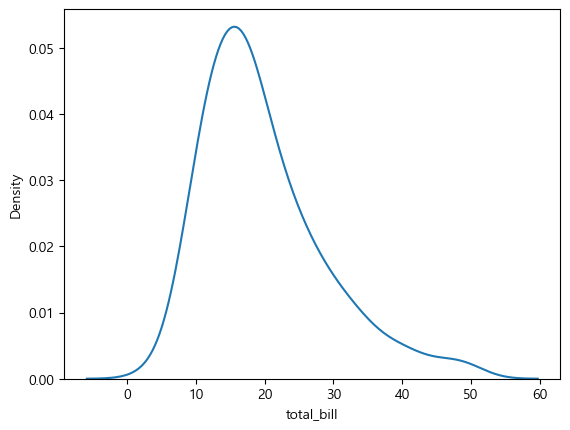

In [10]:
# sns.kdeplot(tips['total_bill'])
sns.kdeplot(x='total_bill', data=tips)
plt.show()

## displot()
- 히스토그램을 기준으로 rugplot, kdeplot을 같이 그릴 수 있다.

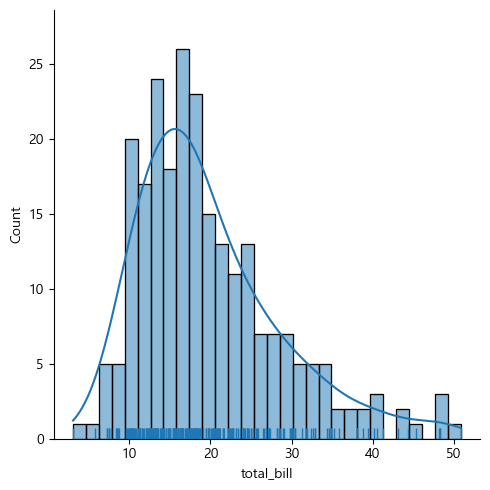

In [26]:
sns.displot(data=tips, x='total_bill', bins=30,
            rug=True, 
            kde=True)
plt.show()

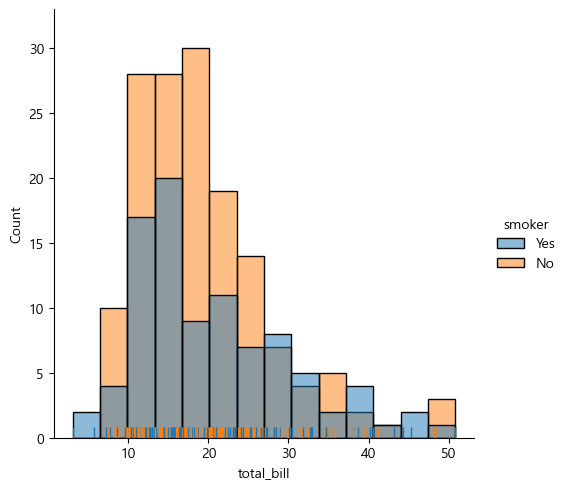

In [19]:
# tips.groupby('smoker')['total_bill']
sns.displot(x='total_bill', hue='smoker', data=tips, rug=True)
plt.show()

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

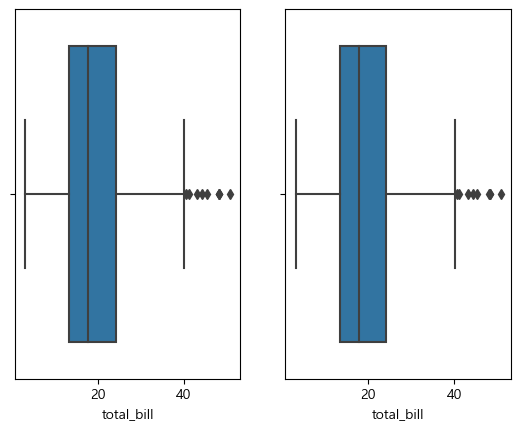

In [30]:
plt.subplot(1,2,1)
sns.boxplot(x='total_bill', data=tips)
            
plt.subplot(1,2,2)
sns.boxplot(x='total_bill', data=tips)
plt.show()


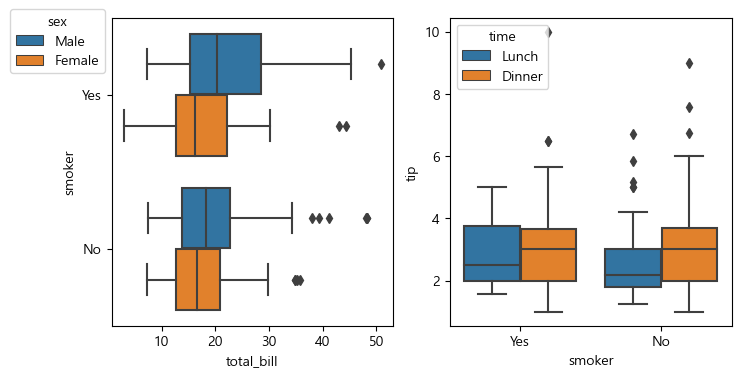

In [39]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# x(y): 연속형, y(x): 범주형
sns.boxplot(x='total_bill', 
            y='smoker', hue='sex', 
            data=tips, ax=ax1)
sns.boxplot(y='tip', x='smoker', hue='time', data=tips, ax=ax2)
ax1.legend(bbox_to_anchor=(0,1.05), loc='upper right', title='sex')
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

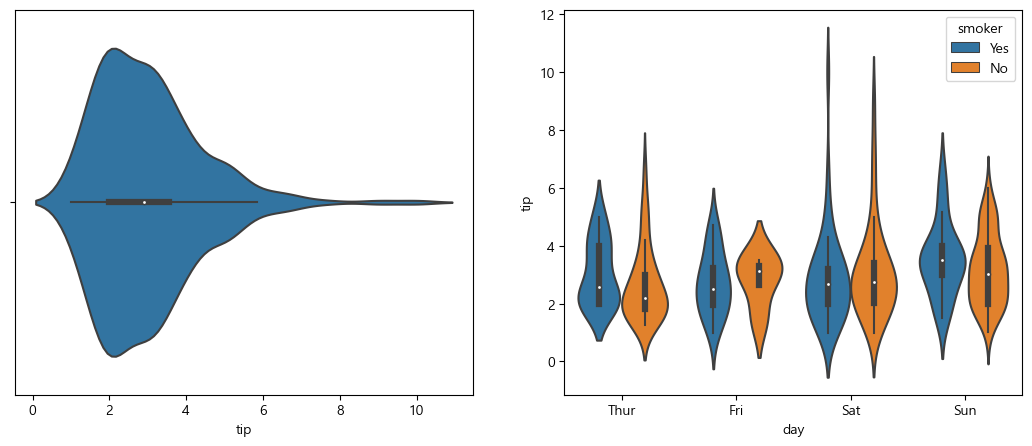

In [44]:
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
sns.violinplot(data=tips, x='tip')

plt.subplot(1, 2, 2)
sns.violinplot(data=tips, y='tip', 
               x='day',  # y: 연속형, x: 범주형
               hue='smoker')

plt.show()

<AxesSubplot: xlabel='tip', ylabel='Density'>

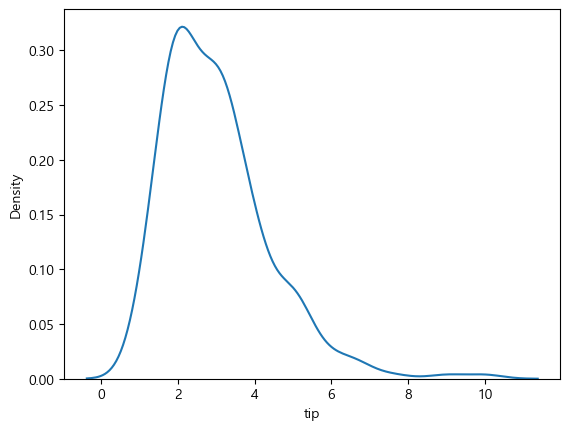

In [42]:
sns.kdeplot(data=tips,x='tip')

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

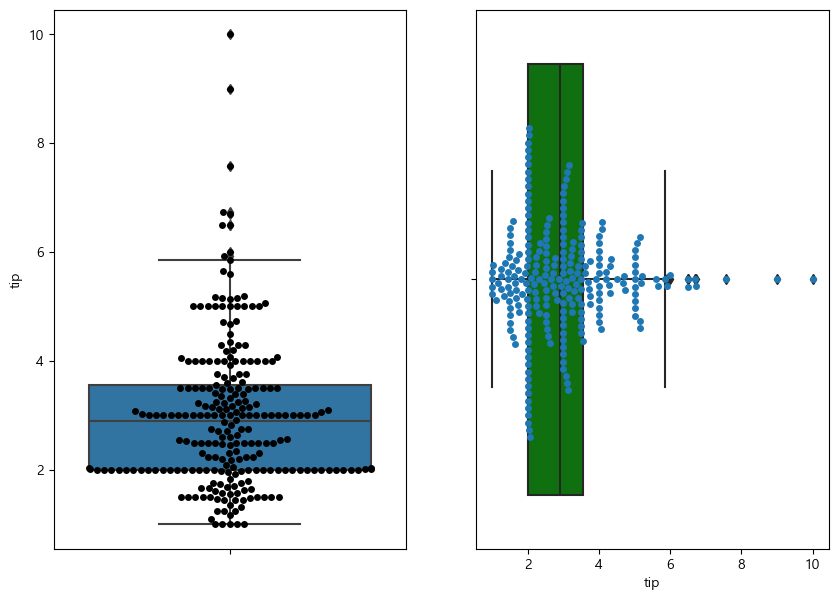

In [52]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.boxplot(y='tip', data=tips)
sns.swarmplot(y='tip', data=tips, color='black')

plt.subplot(1,2,2)
sns.boxplot(x='tip', data=tips, color='green')
sns.swarmplot(x='tip', data=tips)

plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

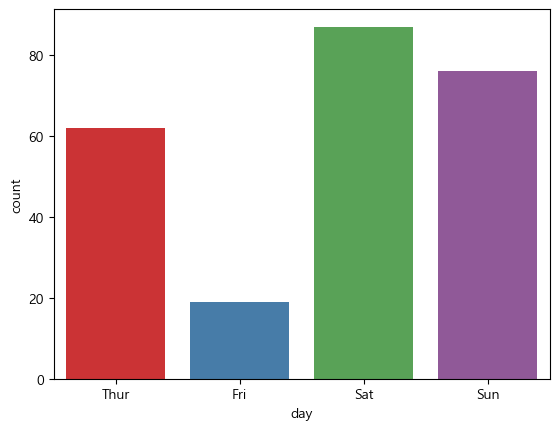

In [78]:
sns.countplot(data=tips, x="day")
plt.show()

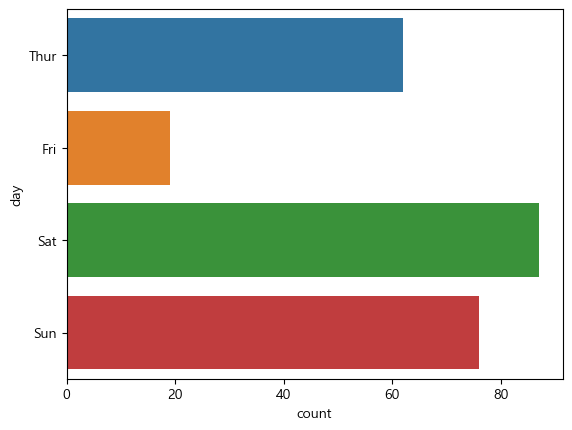

In [57]:
sns.countplot(data=tips, y="day")
plt.show()

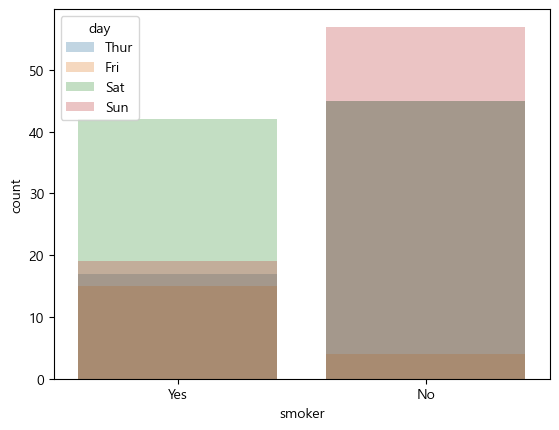

In [63]:
#흡연/비흡연자 개수 요일별로 나눠서 시각화
sns.countplot(x='smoker', hue='day', data=tips, 
             dodge=False,  # 수평누적막대 여부 : 기본-True
             alpha=0.3
             )
plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [74]:
sns.set_palette('Set1')

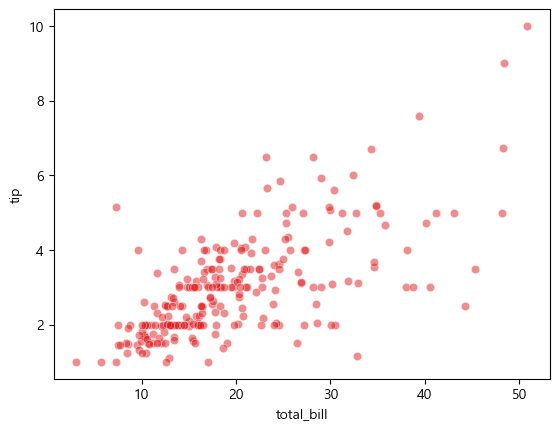

In [76]:
sns.scatterplot(data=tips, x='total_bill', y='tip', alpha=0.5)
plt.show()

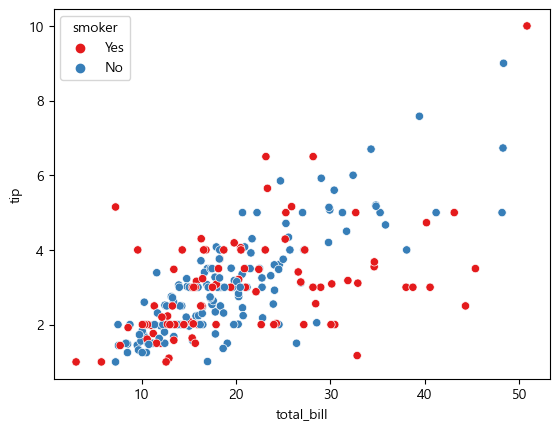

In [77]:
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                hue='smoker'  #smoker 별로
#                 , palette='Set1'
               )
plt.show()

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.

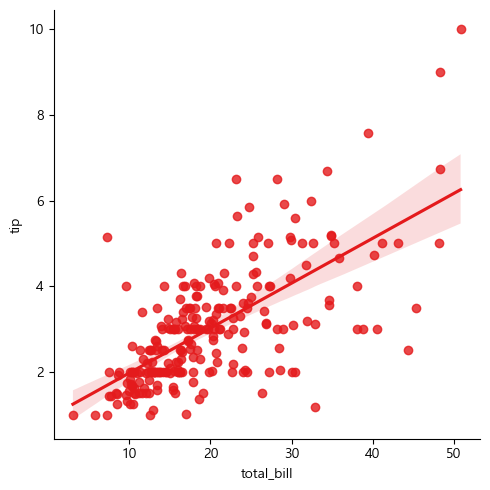

In [79]:
sns.lmplot(data=tips, x="total_bill", y='tip')
plt.show()

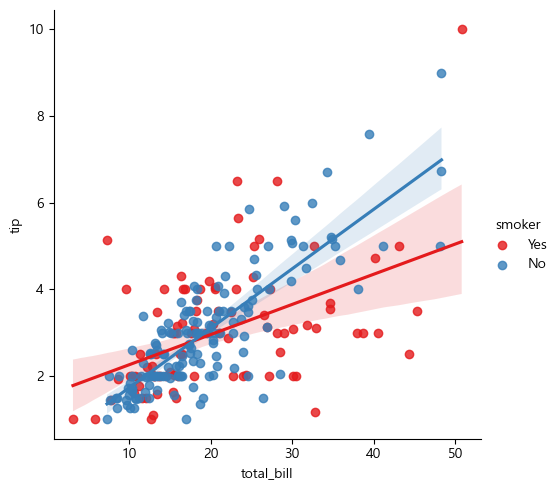

In [80]:
sns.lmplot(data=tips, x="total_bill", y='tip', hue='smoker')
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

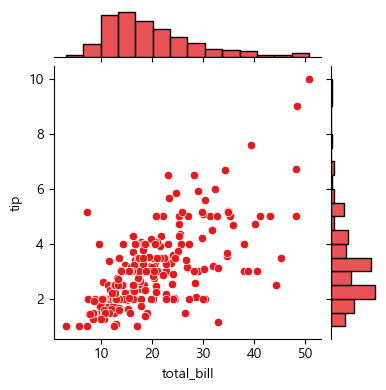

In [85]:
sns.jointplot(x='total_bill', y='tip', data=tips, height=4)
plt.show()

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

In [87]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


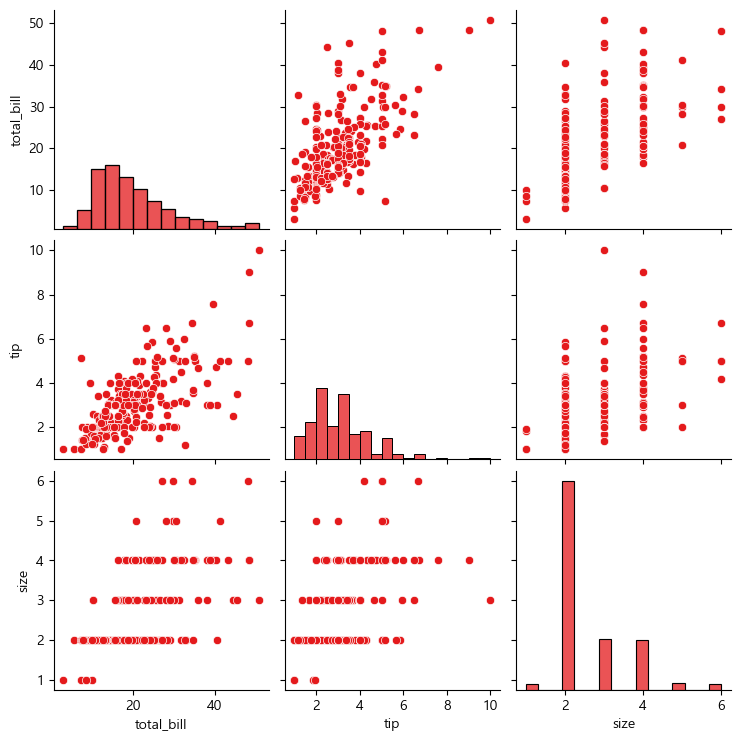

In [88]:
sns.pairplot(tips)
plt.show()

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [89]:
tips.corr()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\3825555837.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


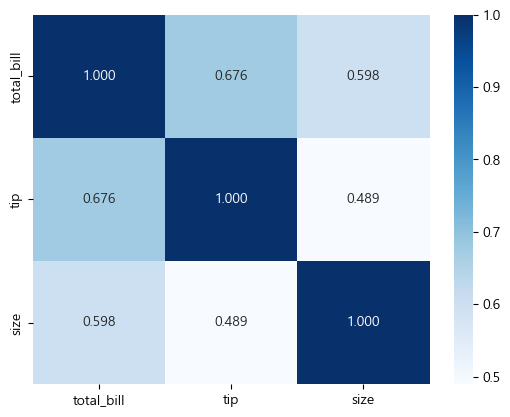

In [95]:
sns.heatmap(tips[["total_bill", "tip", "size"]].corr(), 
            annot=True, # 값 표현
            fmt='.3f',
            cmap='Blues')
plt.show()

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [98]:
import pandas as pd
import numpy as np

index = pd.date_range('2023/01/01', freq="MS", periods=10)
values = np.random.randint(1, 100, size=(10,3))
df = pd.DataFrame(values, index=index, columns=['no1', 'no2', 'no3'])
df

,no1,no2,no3
2023-01-01,1,63,78
2023-02-01,58,62,37
2023-03-01,26,18,43
2023-04-01,66,99,40
2023-05-01,44,21,86
2023-06-01,36,74,80
2023-07-01,64,82,13
2023-08-01,73,28,70
2023-09-01,27,48,89
2023-10-01,98,9,99


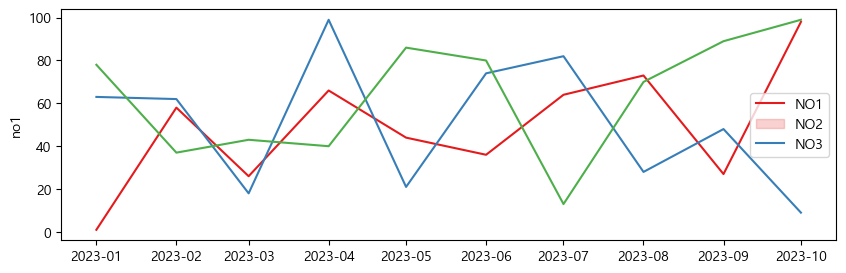

In [103]:
plt.figure(figsize=(10,3))
sns.lineplot(data=df, y='no1', x=df.index)
sns.lineplot(data=df, y='no2', x=df.index)
sns.lineplot(data=df, y='no3', x=df.index)
plt.legend(['NO1', 'NO2', 'NO3'])
plt.show()

In [105]:
df['cate'] = ['A', 'B', 'C','A', 'B', 'C','A', 'B', 'C','C']
df

,no1,no2,no3,cate
2023-01-01,1,63,78,A
2023-02-01,58,62,37,B
2023-03-01,26,18,43,C
2023-04-01,66,99,40,A
2023-05-01,44,21,86,B
2023-06-01,36,74,80,C
2023-07-01,64,82,13,A
2023-08-01,73,28,70,B
2023-09-01,27,48,89,C
2023-10-01,98,9,99,C


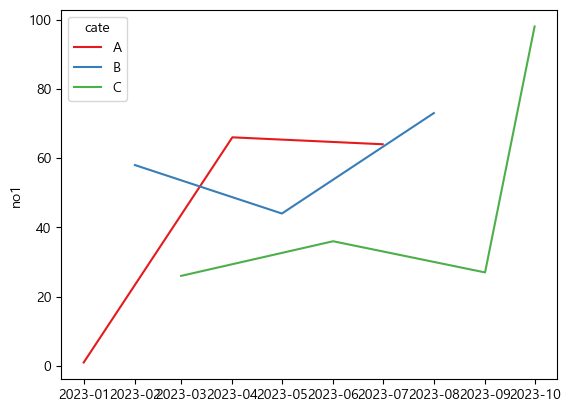

In [106]:
sns.lineplot(data=df, x=df.index, y='no1', hue='cate')
plt.show()